# Recherche des villes dans les titres

In [1]:
pip install GeonamesCache

     |████████████████████████████████| 2.6 MB 5.3 MB/s 


In [2]:
from geonamescache import GeonamesCache
gc = GeonamesCache()

In [3]:
dic_cities2={}
cities = gc.get_cities()
with open('headlines.txt') as file:
    for line in file:
      for j in cities.values():
        if j['name'].upper() in line.upper():
          dic_cities2[line.upper()]=j['name'].upper()
       

In [4]:
pip install locationtagger

     |████████████████████████████████| 1.6 MB 5.0 MB/s 
     |████████████████████████████████| 10.1 MB 41.5 MB/s 
     |████████████████████████████████| 211 kB 42.2 MB/s 
     |████████████████████████████████| 87 kB 5.7 MB/s 
     |████████████████████████████████| 7.4 MB 25.7 MB/s 
     |████████████████████████████████| 81 kB 8.5 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=f04f4eede0e272455e25ec6745d698b5213de5f12d0abb1e7fc623e82425a5b2
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=90ba758bc9df3c2ab014a37b89768fad2e76a09b1dd602e3fde9b573f2a042f7
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=066bdaca0bbce1686ee03fefe70c6bc

In [5]:
import nltk
import spacy

# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
import en_core_web_sm
import locationtagger

nlp = en_core_web_sm.load()

In [7]:
dic_cities={}
with open('headlines.txt') as file:
    for line in file:
        place_entity = locationtagger.find_locations(text = line)
        print("The cities in text : ")
        print(place_entity.cities)
        dic_cities[line]=place_entity.cities
        

The cities in text : 
['Miami']
The cities in text : 
[]
The cities in text : 
['Miami', 'Miami Beach', 'Case']
The cities in text : 
['Brazil', 'Recife']
The cities in text : 
['Dallas']
The cities in text : 
['Trinidad']
The cities in text : 
['Houston']
The cities in text : 
['Battle']
The cities in text : 
['Atlanta']
The cities in text : 
['Sao Paulo']
The cities in text : 
['Brownsville']
The cities in text : 
['St. Louis']
The cities in text : 
['San Juan']
The cities in text : 
['Galveston']
The cities in text : 
[]
The cities in text : 
['Iloilo City']
The cities in text : 
[]
The cities in text : 
['Louisiana']
The cities in text : 
['Orlando']
The cities in text : 
[]
The cities in text : 
['Chicago']
The cities in text : 
['Tampa']
The cities in text : 
['Flint', 'Michigan']
The cities in text : 
['Baltimore']
The cities in text : 
['London']
The cities in text : 
['Ho Chi Minh City']
The cities in text : 
['Philadelphia']
The cities in text : 
['Boston']
The cities in text

# Affectation du nom de ville au titre 

In [9]:
dic_cities

{'18 new Zika Cases in Bogota\n': ['Bogota'],
 '19 new Zika Cases in Sengkang\n': [],
 'Alameda Residents Recieve Rabies vaccine\n': ['Alameda'],
 'Albany Residents Recieve Respiratory Syncytial Virus vaccine\n': ['Albany'],
 'Antipolo under threat from Zika Virus\n': ['Antipolo'],
 'Arhus is infested with Bronchitis\n': [],
 'Arvada is infested with Syphilis\n': ['Arvada'],
 'Authorities a Miami\n': ['Miami'],
 'Authorities are Worried about the Spread of Bronchitis in Silver Spring\n': ['Silver Spring'],
 'Authorities are Worried about the Spread of Chickenpox in Hemet\n': ['Hemet'],
 'Authorities are Worried about the Spread of Chickenpox in Richmond\n': ['Richmond'],
 'Authorities are Worried about the Spread of Dengue in Kingston\n': ['Kingston'],
 'Authorities are Worried about the Spread of Gonorrhea in Taoyuan City\n': ['Taoyuan City'],
 'Authorities are Worried about the Spread of Hepatitis B in Yiwu\n': ['Yiwu'],
 'Authorities are Worried about the Spread of Hepatitis D in Ak

In [112]:
nb_villes=0
for i in dic_cities:
  if len(dic_cities[i])>0:
    nb_villes+=1
print("Nombre de villes détectées: ",nb_villes)

Nombre de villes détectées:  550


Correction des problèmes pour les noms de ville composés

In [11]:
l=[]
for i in dic_cities.keys():
  if len(dic_cities[i])>1:
    print(max(dic_cities[i],key=len))
    dic_cities[i]=max(dic_cities[i],key=len)

Miami Beach
Brazil
Michigan
Kuala Lumpur
Piracicaba
Campinas
Salt Lake City
Seminole
Barcelona
Santa Barbara
Fort Lauderdale
Louisville
Saint Johns
Lafayette
North Miami
Hidalgo
Palm Springs
Wellington
Spanish
Richland Center
Yerevan
Bridgeport
Racine
Alpharetta
Santa Elena
North Platte
Nuevo Laredo
North Bay
West Monroe
Santa Monica
Palo Alto
Spanish
Spanish
Barcelona
Barcelona
North Vancouver
Fairfield
Palm Springs
Moscow
Dongguan
Hauppauge
North Miami Beach
Riverside
Bella Vista


# Recherche des cordonnées polaires pour chaque ville

In [12]:
from geopy.geocoders import Nominatim

In [13]:
lat=[]
lon=[]
city_l=[]
headl=[]
geolocator = Nominatim(user_agent="BraIntelligence")
for i in dic_cities:
  if len(dic_cities[i])>0:
    
    city_l.append(dic_cities[i])
    location = geolocator.geocode(str(dic_cities[i]))
    lat.append(location.latitude)
    lon.append(location.longitude)
    headl.append(i)



In [16]:
import pandas as pd

# Création de notre dataframe

In [17]:
data = {'Headline':headl,'City': city_l,'Lat': lat,'Lon':lon}
df = pd.DataFrame(data)


In [18]:
df.head(5)

,Headline,City,Lat,Lon
0,Zika Outbreak Hits Miami\n,[Miami],25.774173,-80.193620
1,First Case of Zika in Miami Beach\n,Miami Beach,25.792920,-80.135301
2,"Mystery Virus Spreads in Recife, Brazil\n",Brazil,-10.333333,-53.200000
3,Dallas man comes down with case of Zika\n,[Dallas],32.776272,-96.796856
4,Trinidad confirms first Zika case\n,[Trinidad],10.443024,-61.261305


In [19]:
df.describe()

,Lat,Lon
count,550.000000,550.000000
mean,28.830804,-42.681160
std,19.815922,75.921179
min,-41.288795,-156.508940
25%,22.345639,-90.563185
50%,34.665682,-77.615214
75%,41.491573,2.177432
max,59.917857,178.442166


# Visualization géographique des données

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
pip install Basemap

     |████████████████████████████████| 862 kB 5.2 MB/s 
     |████████████████████████████████| 219 kB 52.3 MB/s 
     |████████████████████████████████| 6.3 MB 36.4 MB/s 
     |████████████████████████████████| 30.5 MB 1.5 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=7b1606ef8e4fbb143cf14a7c520ea0d29d5bbb97b80b8b563e55a581168c8b75
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [22]:
from mpl_toolkits.basemap import Basemap

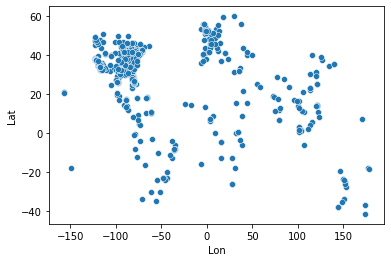

In [23]:
import seaborn as sns
sns.scatterplot(x = "Lon", y = "Lat",data = df,palette='hot')

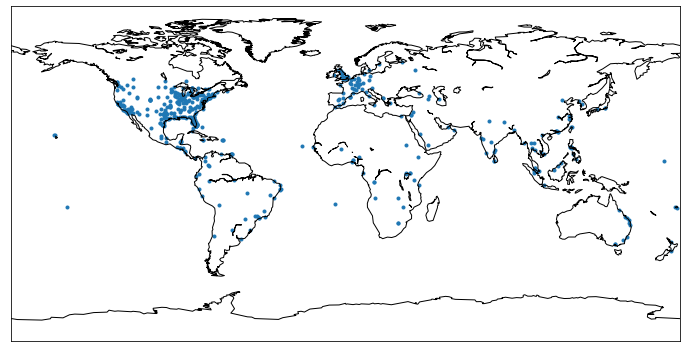

In [24]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(12, 10))
map_plotter = Basemap()
map_plotter.scatter(df['Lon'], df['Lat'], latlon=True, marker='.', alpha=1.0)
map_plotter.drawcoastlines()
plt.show()


In [25]:
from sklearn import cluster 
import numpy as np

# K-Means

# Recherche des hyeperparamètres

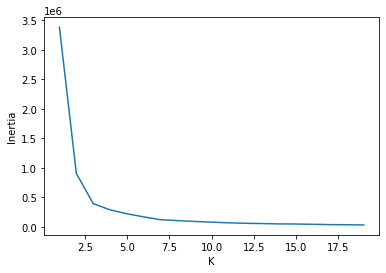

In [26]:
coordinates = df[['Lat', 'Lon']].values
k_values = range(1,20)
inertia_values = []
for k in k_values:
 inertia_values.append(cluster.KMeans(k).fit(coordinates).inertia_)
plt.plot(range(1,20), inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()


La meilleur valeur de k=3

In [27]:
df['Label'] = cluster.KMeans(3).fit_predict(coordinates)

In [28]:
df.head()

,Headline,City,Lat,Lon,Label
0,Zika Outbreak Hits Miami\n,[Miami],25.774173,-80.193620,0
1,First Case of Zika in Miami Beach\n,Miami Beach,25.792920,-80.135301,0
2,"Mystery Virus Spreads in Recife, Brazil\n",Brazil,-10.333333,-53.200000,0
3,Dallas man comes down with case of Zika\n,[Dallas],32.776272,-96.796856,0
4,Trinidad confirms first Zika case\n,[Trinidad],10.443024,-61.261305,0


In [29]:
df.describe()

,Lat,Lon,Label
count,550.000000,550.000000,550.000000
mean,28.830804,-42.681160,0.460000
std,19.815922,75.921179,0.712394
min,-41.288795,-156.508940,0.000000
25%,22.345639,-90.563185,0.000000
50%,34.665682,-77.615214,0.000000
75%,41.491573,2.177432,1.000000
max,59.917857,178.442166,2.000000


In [30]:
print(df['Label'].value_counts())

0    368
1    111
2     71
Name: Label, dtype: int64


In [31]:
df_0=df.groupby(['Label']).get_group(0)

In [32]:
df_1=df.groupby(['Label']).get_group(1)

In [33]:
df_0.describe()

,Lat,Lon,Label
count,368.000000,368.000000,368.0
mean,31.613105,-89.469486,0.0
std,15.412247,18.311248,0.0
min,-34.905892,-156.508940,0.0
25%,28.583856,-97.480081,0.0
50%,35.823554,-86.680100,0.0
75%,41.079797,-77.580227,0.0
max,51.046095,-40.511243,0.0


In [34]:
def plot_clusters(clusters, longitudes, latitudes):
 fig = plt.figure(figsize=(12, 10))
 map_plotter = Basemap()
 map_plotter.scatter(longitudes, latitudes, c=clusters, latlon=True,
 marker='o', alpha=1.0)
 map_plotter.drawcoastlines()
 plt.show()
df['Cluster'] = cluster.KMeans(3).fit_predict(coordinates)


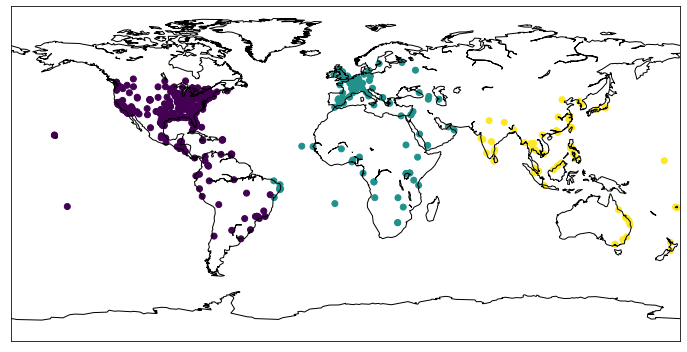

In [35]:
plot_clusters(df['Label'], df.Lon, df.Lat)

In [36]:
df_US=df_0

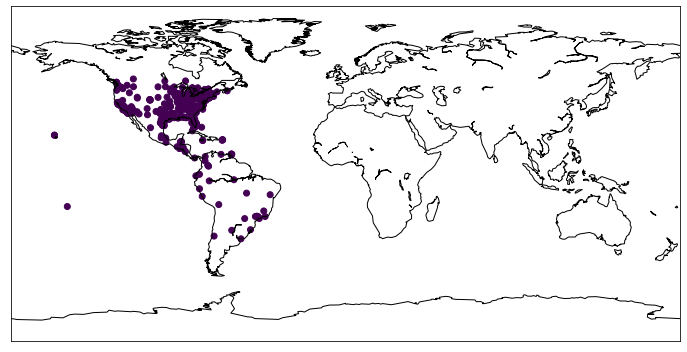

In [37]:
plot_clusters(df_US.Label, df_US.Lon, df_US.Lat)

In [38]:
df_US.describe()

,Lat,Lon,Label
count,368.000000,368.000000,368.0
mean,31.613105,-89.469486,0.0
std,15.412247,18.311248,0.0
min,-34.905892,-156.508940,0.0
25%,28.583856,-97.480081,0.0
50%,35.823554,-86.680100,0.0
75%,41.079797,-77.580227,0.0
max,51.046095,-40.511243,0.0


In [39]:
df_US['Headline']

0                        Zika Outbreak Hits Miami\n
1               First Case of Zika in Miami Beach\n
2         Mystery Virus Spreads in Recife, Brazil\n
3         Dallas man comes down with case of Zika\n
4               Trinidad confirms first Zika case\n
                           ...                     
541     More Zika patients reported in Fort Worth\n
542        Zika symptoms spotted in Boynton Beach\n
543                Outbreak of Zika in Portoviejo\n
548    More Zika patients reported in Bella Vista\n
549                  Zika Outbreak in Wichita Falls
Name: Headline, Length: 368, dtype: object

In [114]:
test=0
for i in df_US['Headline']:
    if 'ZIKA' in i.upper():
      test+=1

In [117]:
print("Pourcentage d'apparition de zika dans les US= ",test/650)

Pourcentage d'apparition de zika dans les US=  0.19076923076923077


In [116]:
test_1=0
for i in df_1['Headline']:
    if 'ZIKA' in i.upper():
      test_1+=1

In [119]:
print("Pourcentage d'apparition de zika dans l'Afrique et l'Europe= ",test_1/650)

Pourcentage d'apparition de zika dans l'Afrique et l'Europe=  0.023076923076923078


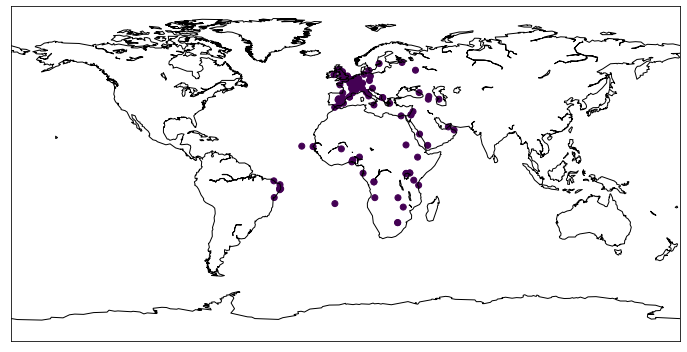

In [43]:
plot_clusters(df_1.Label, df_1.Lon, df_1.Lat)

In [44]:
df_1.describe()

,Lat,Lon,Label
count,111.000000,111.000000,111.0
mean,32.931601,9.344325,1.0
std,23.644871,19.624621,0.0
min,-26.205000,-38.521799,1.0
25%,14.804853,-1.194196,1.0
50%,43.523613,4.832011,1.0
75%,51.293780,19.999962,1.0
max,59.917857,58.382945,1.0


# DBSCAN

In [46]:
#pip install PyMedTermino

In [47]:
from sklearn.cluster import DBSCAN

In [48]:
def great_circle_distance(coord1, coord2, radius=3956):
 if np.array_equal(coord1, coord2):
   return 0.0
 coord1, coord2 = np.radians(coord1), np.radians(coord2)
 delta_x, delta_y = coord2 - coord1
 haversin = np.sin(delta_x / 2) ** 2 + np.product([np.cos(coord1[0]),np.cos(coord2[0]),np.sin(delta_y / 2) ** 2])
 return 2 * radius *np.arcsin(haversin ** 0.5)


In [49]:
metric = great_circle_distance
dbscan = DBSCAN(eps=250, min_samples=3, metric=metric)
df['Cluster'] = dbscan.fit_predict(coordinates)

In [50]:
metric = great_circle_distance
dbscan = DBSCAN(eps=250, min_samples=3, metric=metric)
df['Cluster'] = dbscan.fit_predict(coordinates)


In [51]:
df.head()

,Headline,City,Lat,Lon,Label,Cluster
0,Zika Outbreak Hits Miami\n,[Miami],25.774173,-80.193620,0,0
1,First Case of Zika in Miami Beach\n,Miami Beach,25.792920,-80.135301,0,0
2,"Mystery Virus Spreads in Recife, Brazil\n",Brazil,-10.333333,-53.200000,0,-1
3,Dallas man comes down with case of Zika\n,[Dallas],32.776272,-96.796856,0,0
4,Trinidad confirms first Zika case\n,[Trinidad],10.443024,-61.261305,0,1


In [52]:
df['Cluster'].describe()

count    550.000000
mean       2.716364
std        5.000866
min       -1.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       21.000000
Name: Cluster, dtype: float64

In [53]:
df['Cluster'].value_counts()

 0     240
-1      96
 2      62
 8      49
 12     11
 5      10
 9      10
 3       7
 6       7
 7       6
 17      6
 1       5
 11      5
 14      5
 15      4
 19      4
 10      4
 13      4
 16      3
 18      3
 4       3
 20      3
 21      3
Name: Cluster, dtype: int64

In [55]:
df_no_outliers = df[df.Cluster > -1]

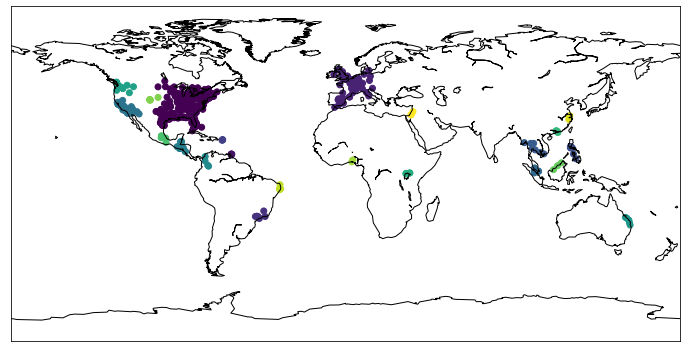

In [56]:
plot_clusters(df_no_outliers.Cluster, df_no_outliers.Lon,df_no_outliers.Lat)

In [57]:
df_no_outliers['Cluster'].value_counts()

0     240
2      62
8      49
12     11
5      10
9      10
3       7
6       7
17      6
7       6
14      5
11      5
1       5
13      4
10      4
15      4
19      4
16      3
4       3
18      3
20      3
21      3
Name: Cluster, dtype: int64

In [67]:
dic_groups={}
for i in set(df_no_outliers['Cluster']):
  dic_groups[i]=df_no_outliers.groupby(['Cluster']).get_group(i)

## Fréquence d'apparition de ZIKA par groupe


In [99]:
nb_zika=0
with open('headlines.txt') as file:
    for line in file:
      
      if 'ZIKA' in line.upper():
        nb_zika+=1
pourc_zika=nb_zika/650
print("Pourcentage d'apparition de Zika dans les titres= ",pourc_zika)

Pourcentage d'apparition de Zika dans les titres=  0.34923076923076923


650


In [84]:
dic_zika={}
for i in dic_groups:
  test=0
  df=dic_groups[i]
  for j in df['Headline']:
     if 'ZIKA' in j.upper():
       test+=1
  dic_zika[i]=test
dic_zika

{0: 80,
 1: 2,
 2: 7,
 3: 6,
 4: 1,
 5: 9,
 6: 7,
 7: 4,
 8: 7,
 9: 7,
 10: 4,
 11: 1,
 12: 2,
 13: 0,
 14: 0,
 15: 4,
 16: 3,
 17: 0,
 18: 0,
 19: 4,
 20: 0,
 21: 0}

In [89]:
df_0_ = df_no_outliers[df_no_outliers.Cluster ==0]
df_0_.describe()

,Lat,Lon,Label,Cluster
count,240.000000,240.000000,240.0,240.0
mean,36.544003,-84.529585,0.0,0.0
std,6.274272,8.145798,0.0,0.0
min,23.135305,-101.879336,0.0,0.0
25%,30.582376,-90.460833,0.0,0.0
50%,38.590043,-82.451799,0.0,0.0
75%,41.529309,-77.967976,0.0,0.0
max,49.895537,-69.107556,0.0,0.0


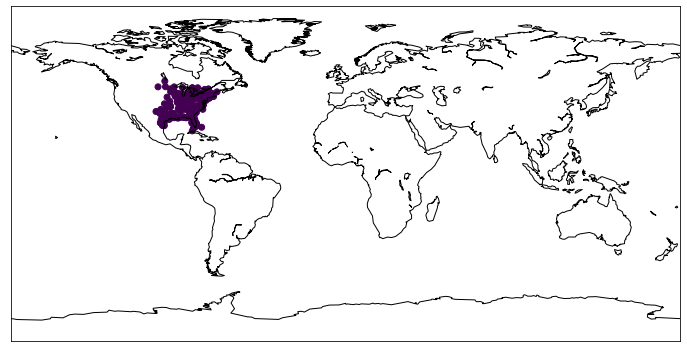

In [90]:
plot_clusters(df_0_.Cluster, df_0_.Lon,df_0_.Lat)

# Recherche d'autres maladies 

In [100]:
nb_virus=0
with open('headlines.txt') as file:
    for line in file:
      
      if 'VIRUS' in line.upper():
        nb_virus+=1
pourc_virus=nb_virus/650
print("Pourcentage d'apparition de Virus dans les titres= ",pourc_virus)

Pourcentage d'apparition de Virus dans les titres=  0.14615384615384616


In [104]:
nb_flu=0
with open('headlines.txt') as file:
    for line in file:
      
      if 'FLU' in line.upper():
        nb_flu+=1
pourc_flu=nb_flu/650
print("Pourcentage d'apparition de Flu dans les titres= ",pourc_flu)

Pourcentage d'apparition de Flu dans les titres=  0.043076923076923075


In [106]:
nb_tub=0
with open('headlines.txt') as file:
    for line in file:
      
      if 'Tuberculosis'.upper() in line.upper():
        nb_tub+=1
pourc_tub=nb_tub/650
print("Pourcentage d'apparition de Tuberculosis dans les titres= ",pourc_tub)

Pourcentage d'apparition de Tuberculosis dans les titres=  0.012307692307692308


 Le pourcentage d'apparitions des autres maladies est très faible pour qu'on puisse y effectuer une analyse détaillée